#  Ballot Boxes Clustering
## Done by: Ariel Oren

Steps: 

* Read in a collection of documents 
* Normilazed Votes per ballot boxes
* Apply K-means on the data
* Annalize Country election wide results
* Annalize Cluster election results
* Find anomalous ballot boxes (outliers detection)
* Create the voting distribution on map for visualize geographic attributes
* Data Arrangment (Pre EDA)
* Exploratory Data Analysis (EDA)
* Data Cleansing
* Feature Engineering
* Feature Selection
* Create modeling base on Clustering results for predict future settlements voting clustering.
* Present findings in terms of campaign recommendations (added in additional document)


### Libraries imports 

In [1]:
import numpy as np  # linear algebra
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns


### Uploading data

In [2]:
expb_pd = pd.read_csv("C:/Users/user/Documents/Ariel/Israeli_Ballot_Boxes_Clustering/Ballot_Boxes_Clustering/expb_.csv", delimiter='	')
expb_pd_names = expb_pd.columns # for future work
party_names = expb_pd_names[7:] #getting all the party names
bycode_pd = pd.read_excel('C:/Users/user/Documents/Ariel/Israeli_Ballot_Boxes_Clustering/Ballot_Boxes_Clustering/bycode.xls', index_col=0)
bycode_pd_columns = bycode_pd.columns
p_libud_12_pd = pd.read_excel('C:/Users/user/Documents/Ariel/Israeli_Ballot_Boxes_Clustering/Ballot_Boxes_Clustering/p_libud_12.xls',
                              index_col=0)  # not many data so i wont work on it.

In [3]:
expb_pd.head(10)

,שם ישוב,סמל ישוב,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,...,פך,פנ,פץ,ץ,צפ,צק,ק,קנ,רק,שס
0,אבו ג'ווייעד (שבט,967,1.0,690,118,8,110,0,0,3,...,0,0,0,0,1,0,0,0,0,3
1,אבו ג'ווייעד (שבט,967,2.0,753,99,3,96,2,0,10,...,0,0,0,0,0,0,0,0,0,1
2,אבו גוש,472,1.0,725,352,13,339,23,4,116,...,0,0,1,1,7,1,1,1,0,30
3,אבו גוש,472,2.0,670,329,7,322,26,0,119,...,0,1,0,1,3,2,1,1,0,8
4,אבו גוש,472,3.0,704,345,20,325,22,1,111,...,0,0,0,1,2,0,1,2,0,5
5,אבו גוש,472,4.0,667,342,19,323,20,0,131,...,0,1,2,1,12,0,0,0,1,26
6,אבו גוש,472,5.0,588,237,11,226,13,1,75,...,0,1,0,1,2,0,0,0,0,26
7,אבו גוש,472,6.0,535,239,9,230,14,1,92,...,0,0,0,2,5,1,1,0,0,11
8,אבו סנאן,473,1.0,631,366,4,362,9,1,41,...,0,0,1,1,11,0,0,1,0,23
9,אבו סנאן,473,2.0,620,388,8,380,4,0,55,...,0,0,0,3,5,0,1,0,1,3


In [4]:
bycode_pd.head(10)

,שם יישוב.1,סמל,תעתיק,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2013,...,שנת ייסוד,צורת יישוב שוטפת,השתייכות ארגונית,קואורדינטות,גובה ממוצע,ועדת תכנון,מרחב משטרה,תעתיק פרסומים,שנת עיבוד,שדה לקישור
שם יישוב,,,,,,,,,,,,,,,,,,,,,
אבו ג'ווייעד (שבט),NaN,967,ABU JUWEI'ID,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,2.040057e+09,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=967
אבו גוש,אבו גוש,472,ABU GHOSH ...,1,11,111.0,99.0,444.0,2.0,6600.0,...,NaN,280,NaN,2.105263e+09,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472
אבו סנאן,אבו סנאן,473,ABU SINAN ...,2,24,245.0,99.0,NaN,2.0,13045.0,...,NaN,270,NaN,2.160676e+09,71.0,252.0,1330.0,Abu Sinan,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=473
אבו סריחאן (שבט),NaN,935,ABU SUREIHAN,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.865057e+09,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=935
אבו עבדון (שבט),NaN,958,ABU ABDUN,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.850058e+09,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=958
אבו עמאר (שבט),NaN,1042,ABU AMMAR,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.950057e+09,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=1042
אבו עמרה (שבט),NaN,932,ABU AMRE,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.850057e+09,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=932
אבו קורינאת (יישוב),אבו קורינאת (יישוב),1342,ABU QUREINAT ...,6,62,623.0,68.0,NaN,2.0,1133.0,...,NaN,450,NaN,1.962956e+09,450.0,624.0,3481.0,Abu Qureinat,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=1342
אבו קורינאת (שבט),NaN,968,ABU QUREINAT,6,62,623.0,NaN,NaN,3.0,NaN,...,NaN,460,NaN,1.970056e+09,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=968


### Normilazed Votes

we want to normilazed the votes for using K means algoritm

In [5]:
normalized_votes = expb_pd.copy()
z = 0
for col in party_names:
    normalized_votes[col] = expb_pd[col] / expb_pd['כשרים']


In [6]:
normalized_votes.head(10)


,שם ישוב,סמל ישוב,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,...,פך,פנ,פץ,ץ,צפ,צק,ק,קנ,רק,שס
0,אבו ג'ווייעד (שבט,967,1.0,690,118,8,110,0.000000,0.000000,0.027273,...,0.0,0.000000,0.000000,0.000000,0.009091,0.000000,0.000000,0.000000,0.000000,0.027273
1,אבו ג'ווייעד (שבט,967,2.0,753,99,3,96,0.020833,0.000000,0.104167,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010417
2,אבו גוש,472,1.0,725,352,13,339,0.067847,0.011799,0.342183,...,0.0,0.000000,0.002950,0.002950,0.020649,0.002950,0.002950,0.002950,0.000000,0.088496
3,אבו גוש,472,2.0,670,329,7,322,0.080745,0.000000,0.369565,...,0.0,0.003106,0.000000,0.003106,0.009317,0.006211,0.003106,0.003106,0.000000,0.024845
4,אבו גוש,472,3.0,704,345,20,325,0.067692,0.003077,0.341538,...,0.0,0.000000,0.000000,0.003077,0.006154,0.000000,0.003077,0.006154,0.000000,0.015385
5,אבו גוש,472,4.0,667,342,19,323,0.061920,0.000000,0.405573,...,0.0,0.003096,0.006192,0.003096,0.037152,0.000000,0.000000,0.000000,0.003096,0.080495
6,אבו גוש,472,5.0,588,237,11,226,0.057522,0.004425,0.331858,...,0.0,0.004425,0.000000,0.004425,0.008850,0.000000,0.000000,0.000000,0.000000,0.115044
7,אבו גוש,472,6.0,535,239,9,230,0.060870,0.004348,0.400000,...,0.0,0.000000,0.000000,0.008696,0.021739,0.004348,0.004348,0.000000,0.000000,0.047826
8,אבו סנאן,473,1.0,631,366,4,362,0.024862,0.002762,0.113260,...,0.0,0.000000,0.002762,0.002762,0.030387,0.000000,0.000000,0.002762,0.000000,0.063536
9,אבו סנאן,473,2.0,620,388,8,380,0.010526,0.000000,0.144737,...,0.0,0.000000,0.000000,0.007895,0.013158,0.000000,0.002632,0.000000,0.002632,0.007895


In [7]:
normalized_votes.isnull().sum()

 שם ישוב     0
סמל ישוב     0
מספר קלפי    0
בזב          0
מצביעים      0
פסולים       0
כשרים        0
אמת          3
ג            3
ד            3
הי           3
הפ           3
הק           3
ו            3
ז            3
זה           3
זך           3
טב           3
יק           3
כן           3
מחל          3
מרץ          3
נ            3
ני           3
נץ           3
נק           3
עם           3
פ            3
פה           3
פז           3
פי           3
פך           3
פנ           3
פץ           3
ץ            3
צפ           3
צק           3
ק            3
קנ           3
רק           3
שס           3
dtype: int64

As we can see above, there are 3 missing values in every ( that was coused by devided by zero)
devided by zero mean there are no people who vote at that specific settlement, so we will fill all the missing values with zeros

In [8]:
normalized_votes = normalized_votes.fillna(0) #fill with zero


Plotting of the Cost function J as function of Number of Clusters for choosing the right number of clusters

1 1249.904529536523
2 907.2026959550387
3 667.4938876016466
4 498.02650885820356
5 422.81485844636023
6 378.6416420912029
7 339.5572256689995
8 303.22323434915165
9 280.5935026079033
10 259.416508714053
11 242.98620552611683
12 231.70242299166117
13 222.54835066444045
14 213.34239074791847
15 204.7992442110799
16 196.92892031221848
17 188.53640812116032
18 182.39592674247027
19 176.4635494681769


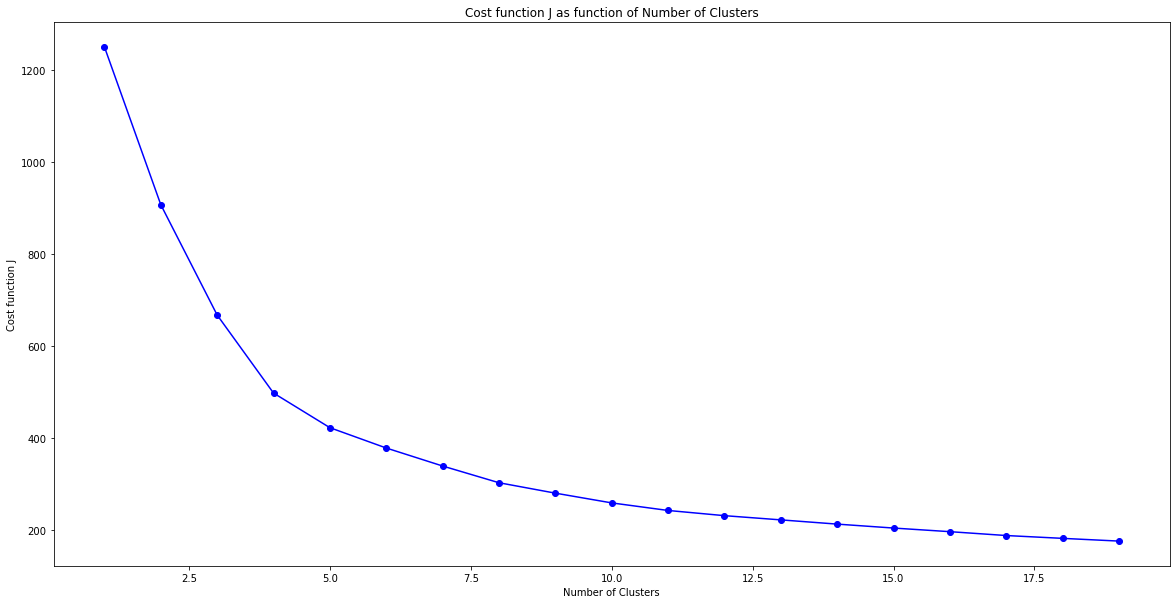

In [111]:
inertias = {}
for num_clusters in range(1, 20):
    kmeans = KMeans(num_clusters)
    kmeans.fit(normalized_votes[party_names])
    inertias[num_clusters] = kmeans.inertia_
    print(num_clusters, kmeans.inertia_)

pd.Series(inertias).plot(style='b-o')
plt.title('Cost function J as function of Number of Clusters')
plt.xlabel("Number of Clusters")
plt.ylabel("Cost function J")

plt.show()

Increasing K will alwats decrase the objective.
so i want to find the "elbow", where increasing K does not contribute

from the plot above,i choose the number 5 as it looks liket the elbow

In [126]:
kmeans = KMeans(5, random_state=42)
kmeans.fit(normalized_votes[party_names])
5, kmeans.inertia_ # inertia is the sum of squared distances of samples to their closest cluster center.

(5, 422.81485844636023)

### Country wide results

In [11]:
country_wide_results = pd.DataFrame(normalized_votes[[col for col in party_names]].mean().round(2)).transpose()

country_wide_results = country_wide_results.drop(columns=country_wide_results.columns[(country_wide_results == 0.0).any()])#here i remove all the parties with zero values
country_wide_results

,אמת,ג,ד,ו,ז,טב,יק,כן,מחל,מרץ,נץ,עם,פה,פז,ץ,צפ,קנ,שס
0,0.11,0.04,0.03,0.03,0.01,0.09,0.01,0.02,0.24,0.05,0.02,0.04,0.14,0.01,0.01,0.05,0.01,0.09


In [12]:
country_wide_results_T = country_wide_results.T
country_wide_results_T

,0
אמת,0.11
ג,0.04
ד,0.03
ו,0.03
ז,0.01
טב,0.09
יק,0.01
כן,0.02
מחל,0.24
מרץ,0.05


In [13]:
country_wide_results_T = country_wide_results_T.rename(columns={0:"party_%"})
country_wide_results_T

,party_%
אמת,0.11
ג,0.04
ד,0.03
ו,0.03
ז,0.01
טב,0.09
יק,0.01
כן,0.02
מחל,0.24
מרץ,0.05


the country wide results


<AxesSubplot:>

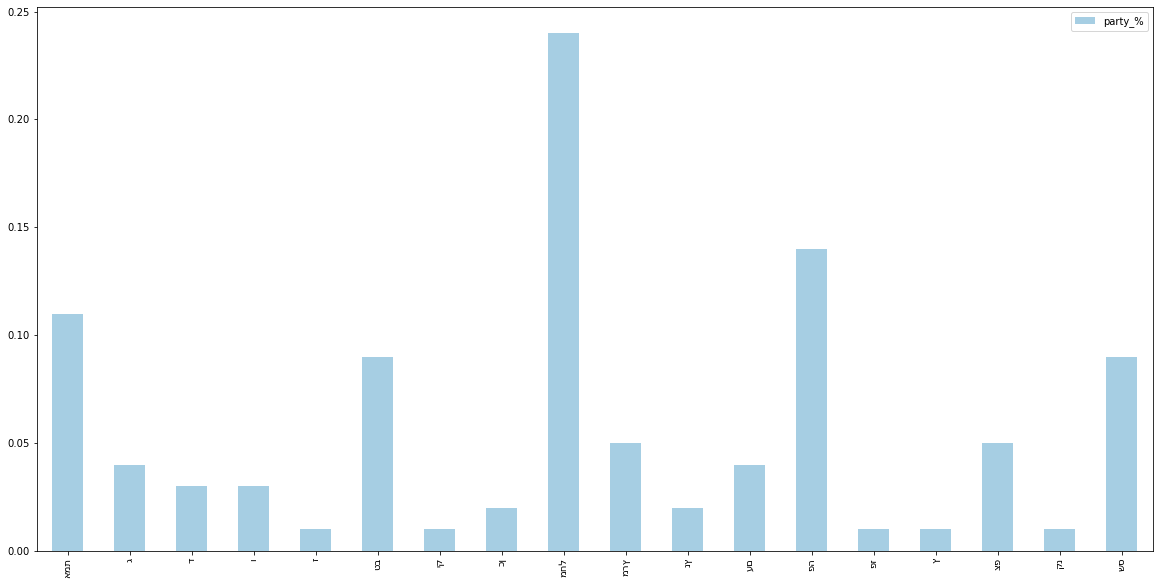

In [110]:
print("the country wide results")
country_wide_results_T.plot(kind='bar', stacked=True, colormap='Paired')

### Cluster election results
For better vizulaizetion ill remove all the partys that didnt get any vote (by using country_wide_results for the parties) 
that would be choose

In [15]:
cluster_results = pd.DataFrame(kmeans.cluster_centers_, columns=party_names).round(2)
cluster_results = cluster_results[country_wide_results.columns]
cluster_results

,אמת,ג,ד,ו,ז,טב,יק,כן,מחל,מרץ,נץ,עם,פה,פז,ץ,צפ,קנ,שס
0,0.20,0.01,0.00,0.01,0.01,0.06,0.00,0.03,0.18,0.10,0.01,0.00,0.24,0.00,0.01,0.08,0.01,0.02
1,0.04,0.00,0.24,0.23,0.00,0.00,0.00,0.01,0.03,0.03,0.00,0.35,0.01,0.00,0.00,0.01,0.00,0.03
2,0.01,0.59,0.00,0.00,0.00,0.04,0.00,0.00,0.04,0.00,0.03,0.00,0.01,0.01,0.00,0.00,0.00,0.26
3,0.08,0.02,0.00,0.01,0.01,0.10,0.01,0.02,0.37,0.02,0.02,0.00,0.11,0.01,0.01,0.04,0.01,0.13
4,0.03,0.03,0.00,0.00,0.00,0.51,0.00,0.01,0.16,0.01,0.09,0.00,0.05,0.01,0.02,0.01,0.01,0.06


Cluster election results


<AxesSubplot:>

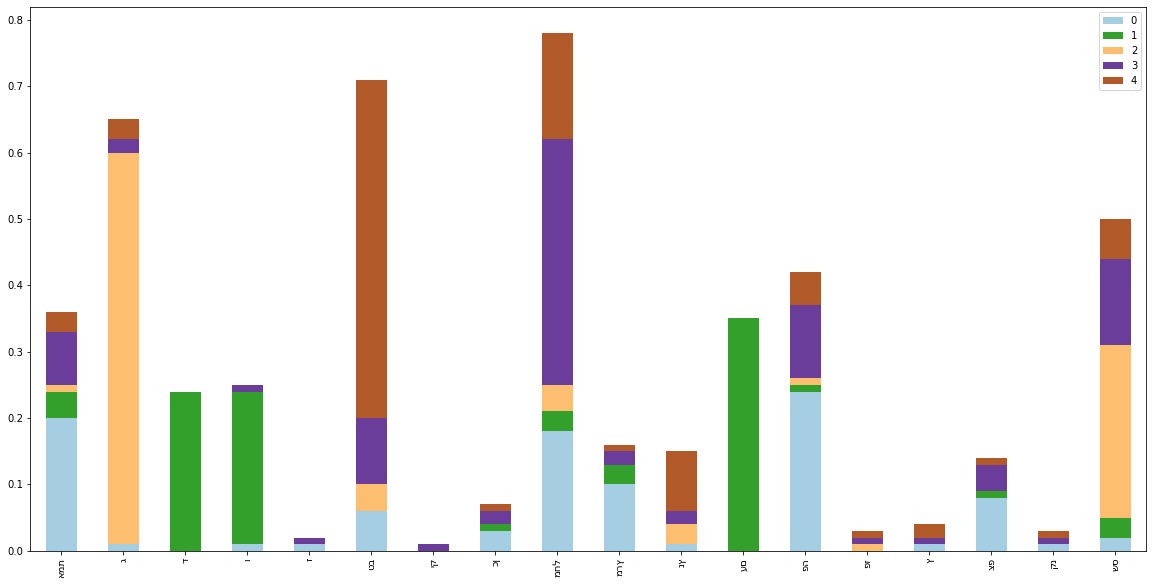

In [109]:
cluster_results_T=cluster_results.T
print("Cluster election results")
cluster_results_T.plot(kind='bar', stacked=True, colormap='Paired')

In [17]:
# each cluster has a different number of sections that belong to it. the distribution is as follows:
clusters_distribution = pd.Series(kmeans.labels_).value_counts()
clusters_distribution

3    4578
0    3479
1    1114
2     584
4     354
dtype: int64

Cluster election results distribution
Discrete plot of number of people as function of cluster


<AxesSubplot:>

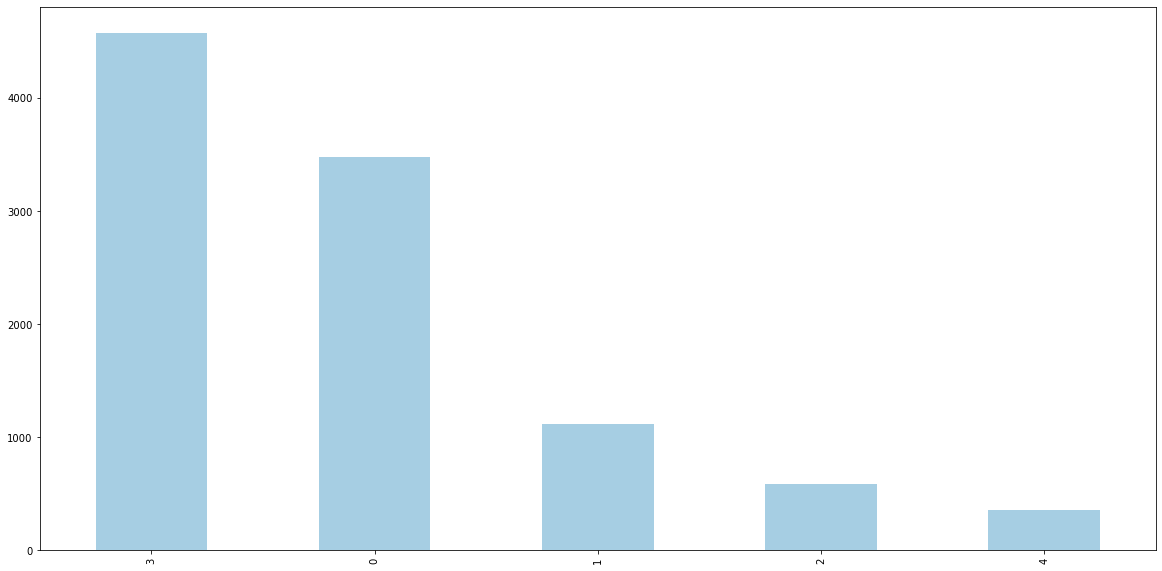

In [108]:
clusters_distribution_T=clusters_distribution.T
print("Cluster election results distribution")
print("Discrete plot of number of people as function of cluster")
clusters_distribution_T.plot(kind='bar', stacked=True, colormap='Paired')

#### Example of clustering results in 2D figure

here i draw an example of clustering,
in 2D for two parties result,
"Israeli Labor Party" and "United Torah Judaism"
they mostly have a different voter sectors so i predict that the clusters would be the same

In [123]:
def kmeans_scatter(data, cluster_centers,y_pred,\
                   first_party=0,second_party=1,\
                   first_party_name='Israeli Labor Party',\
                   second_party_name='United Torah Judaism'):
    
    X = data[:, 0]
    y = data[:, 1]
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(X, y, c=y_pred)
    
    # produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Clusters")
    ax.add_artist(legend1)

    xx = cluster_centers[:, first_party]
    yy = cluster_centers[:, second_party]
    
    plt.scatter(xx, yy, c='r',s=150, marker='^')
    plt.title(f'{first_party_name} vs {second_party_name}')
    plt.xlabel(first_party_name)
    plt.ylabel(second_party_name)
    plt.rcParams["figure.figsize"] = (20,10)
    plt.show()

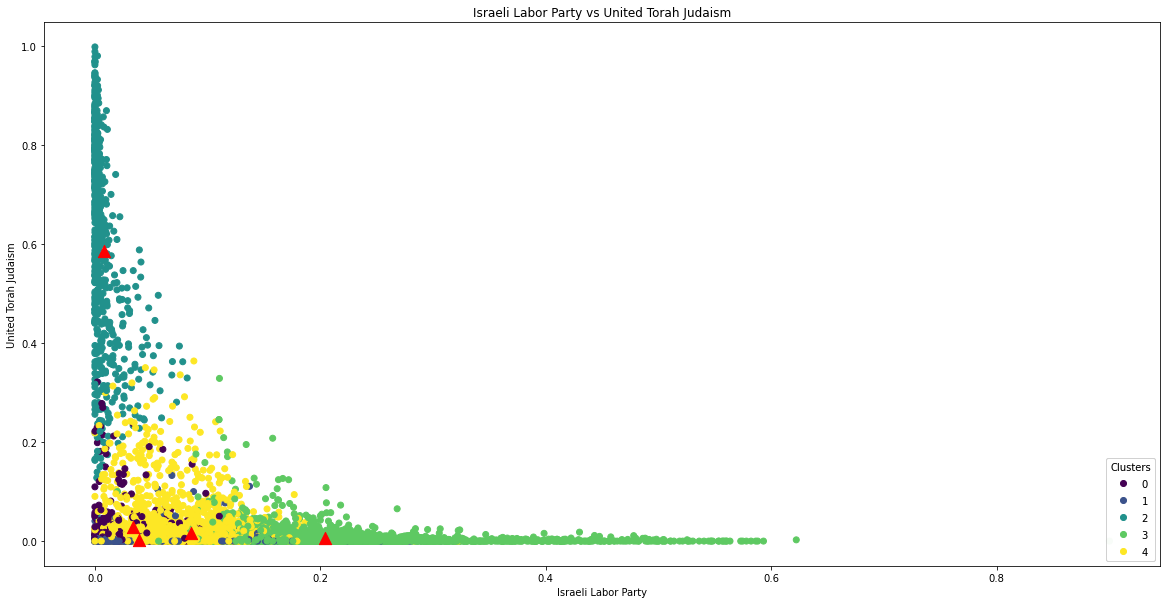

In [127]:
x = np.array(normalized_votes[party_names])
y_pred =kmeans.fit_predict(normalized_votes[party_names])
kmeans_scatter(x, kmeans.cluster_centers_,y_pred)


it can been seen that most of the points are classified at the edgh of the plot, this is bacause we know most of 
Israeli Labor Party and Unitd Torah Judaism are differnte type of population - cluster 2 contain most of the Unitd Torah Judaism, it is true that cluster 0 contain most of Israeli Labor Party but has littlebit of Unitd Torah Judaism so his in the middle of them, cluster 4 contain Unitd Torah Judaism and Israeli Labor Party so his also in the middle of the two parties,
cluster 3 on the other hand has many Israeli Labor Party voters and almost none Unitd Torah Judaism so for that reason his on the other edgh

# Anomalous ballot boxes (outliers detection)
By using IQR (interquartile range) which is measure of statistical dispersion, that help us to detect outliers
i'll split the data by the cluster and then apply IQR for every cluster's group.


In [21]:
def getOutliersMatrix(numerical_df, threshold=1.5):
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1

    outdata = (numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))

    for name in numerical_df.columns:
        outdata.loc[(outdata[name] == True), name] = 1
        outdata.loc[(outdata[name] == False), name] = 0

    return outdata


here we calculate distances for each Anomalous ballot boxe from his cluster center

In [23]:
distances = sp.spatial.distance_matrix(normalized_votes[party_names], kmeans.cluster_centers_)
distances_from_cluster=distances.min(axis=1) # by taking the min value we get the cluter our Anomalous ballot releat to
distances_from_cluster=pd.DataFrame(distances_from_cluster,columns=['distance']) #convert to dataframe for using the getOutliersMatrix 
distances_from_cluster.head(5)

,distance
0,0.594123
1,0.580332
2,0.226951
3,0.192791
4,0.248556


In [24]:
distances_from_cluster = distances_from_cluster.rename(columns = {'distance': 'Outlier'}, inplace = False)#change column name
outliersMatt = getOutliersMatrix(distances_from_cluster)

outliersMatt.head(10)

,Outlier
0,1
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Here i get the number of outliers

In [25]:
unique, counts = np.unique(outliersMatt, return_counts=True)

num_of_outliers = dict(zip(unique, counts))
num_of_outliers

{0: 9496, 1: 613}

## Create the voting distribution on map for visualize geographic attributes 

In [26]:
kmeans_predict = kmeans.predict(np.array(normalized_votes[party_names]))
kmeans_predict = pd.DataFrame(kmeans_predict,columns=['cluster'])
kmeans_predict.head(10)

,cluster
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [27]:
bycode_pd = bycode_pd.rename(columns={'סמל': 'symbol'})  # change th name to english for future merge with expb_pd
normalized_votes = normalized_votes.rename(columns={'סמל ישוב': 'symbol'})  # change th name to english for future merge with bycode_pd
normalized_votes['kmeans_predict']=kmeans_predict #adding the predicted clustering to the dataframe
normalized_votes.head(10)

,שם ישוב,symbol,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,...,פנ,פץ,ץ,צפ,צק,ק,קנ,רק,שס,kmeans_predict
0,אבו ג'ווייעד (שבט,967,1.0,690,118,8,110,0.000000,0.000000,0.027273,...,0.000000,0.000000,0.000000,0.009091,0.000000,0.000000,0.000000,0.000000,0.027273,1
1,אבו ג'ווייעד (שבט,967,2.0,753,99,3,96,0.020833,0.000000,0.104167,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010417,1
2,אבו גוש,472,1.0,725,352,13,339,0.067847,0.011799,0.342183,...,0.000000,0.002950,0.002950,0.020649,0.002950,0.002950,0.002950,0.000000,0.088496,1
3,אבו גוש,472,2.0,670,329,7,322,0.080745,0.000000,0.369565,...,0.003106,0.000000,0.003106,0.009317,0.006211,0.003106,0.003106,0.000000,0.024845,1
4,אבו גוש,472,3.0,704,345,20,325,0.067692,0.003077,0.341538,...,0.000000,0.000000,0.003077,0.006154,0.000000,0.003077,0.006154,0.000000,0.015385,1
5,אבו גוש,472,4.0,667,342,19,323,0.061920,0.000000,0.405573,...,0.003096,0.006192,0.003096,0.037152,0.000000,0.000000,0.000000,0.003096,0.080495,1
6,אבו גוש,472,5.0,588,237,11,226,0.057522,0.004425,0.331858,...,0.004425,0.000000,0.004425,0.008850,0.000000,0.000000,0.000000,0.000000,0.115044,1
7,אבו גוש,472,6.0,535,239,9,230,0.060870,0.004348,0.400000,...,0.000000,0.000000,0.008696,0.021739,0.004348,0.004348,0.000000,0.000000,0.047826,1
8,אבו סנאן,473,1.0,631,366,4,362,0.024862,0.002762,0.113260,...,0.000000,0.002762,0.002762,0.030387,0.000000,0.000000,0.002762,0.000000,0.063536,1
9,אבו סנאן,473,2.0,620,388,8,380,0.010526,0.000000,0.144737,...,0.000000,0.000000,0.007895,0.013158,0.000000,0.002632,0.000000,0.002632,0.007895,1


merge to a final pdf
merge by settlement symbol which is the settlement ID (symbol)

In [28]:
merge_pd = pd.merge(normalized_votes, bycode_pd, how='inner', on ='symbol')
merge_pd.head(10)

,שם ישוב,symbol,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,...,שנת ייסוד,צורת יישוב שוטפת,השתייכות ארגונית,קואורדינטות,גובה ממוצע,ועדת תכנון,מרחב משטרה,תעתיק פרסומים,שנת עיבוד,שדה לקישור
0,אבו ג'ווייעד (שבט,967,1.0,690,118,8,110,0.000000,0.000000,0.027273,...,NaN,460,NaN,2.040057e+09,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=967
1,אבו ג'ווייעד (שבט,967,2.0,753,99,3,96,0.020833,0.000000,0.104167,...,NaN,460,NaN,2.040057e+09,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=967
2,אבו גוש,472,1.0,725,352,13,339,0.067847,0.011799,0.342183,...,NaN,280,NaN,2.105263e+09,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472
3,אבו גוש,472,2.0,670,329,7,322,0.080745,0.000000,0.369565,...,NaN,280,NaN,2.105263e+09,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472
4,אבו גוש,472,3.0,704,345,20,325,0.067692,0.003077,0.341538,...,NaN,280,NaN,2.105263e+09,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472
5,אבו גוש,472,4.0,667,342,19,323,0.061920,0.000000,0.405573,...,NaN,280,NaN,2.105263e+09,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472
6,אבו גוש,472,5.0,588,237,11,226,0.057522,0.004425,0.331858,...,NaN,280,NaN,2.105263e+09,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472
7,אבו גוש,472,6.0,535,239,9,230,0.060870,0.004348,0.400000,...,NaN,280,NaN,2.105263e+09,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472
8,אבו סנאן,473,1.0,631,366,4,362,0.024862,0.002762,0.113260,...,NaN,270,NaN,2.160676e+09,71.0,252.0,1330.0,Abu Sinan,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=473
9,אבו סנאן,473,2.0,620,388,8,380,0.010526,0.000000,0.144737,...,NaN,270,NaN,2.160676e+09,71.0,252.0,1330.0,Abu Sinan,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=473


In [29]:
merge_pd['קואורדינטות']=merge_pd['קואורדינטות'].astype('int64')
merge_pd['coordinate']=merge_pd['קואורדינטות'].astype(str)## convert the coordinate column to string for slice it to X coordinate and Y coordinate

### Coordinates analysis

Working on the coordinate - we want to reorder the coordinate column to x cooredinate and y coordinate
the way of doing that is to seperate every number at the column to half - the first one is for the X coordinate,
the scond one is to the y coordinate,

then we add zero to the units digit for expend the coordinates length from 5 to 6, which would give us 
Israel Transverse Mercator (ITM) coordinates

In [30]:
merge_pd['x_coordinate']= merge_pd['coordinate'].str.slice(start=0, stop=5) +str(0)
merge_pd['x_coordinate']=merge_pd['x_coordinate'].astype('int64')
merge_pd['y_coordinate']= merge_pd['coordinate'].str.slice(start=5) +str(0)
merge_pd['y_coordinate']=merge_pd['y_coordinate'].astype('int64')
merge_pd.head(10)

,שם ישוב,symbol,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,...,קואורדינטות,גובה ממוצע,ועדת תכנון,מרחב משטרה,תעתיק פרסומים,שנת עיבוד,שדה לקישור,coordinate,x_coordinate,y_coordinate
0,אבו ג'ווייעד (שבט,967,1.0,690,118,8,110,0.000000,0.000000,0.027273,...,2040057100,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=967,2040057100,204000,571000
1,אבו ג'ווייעד (שבט,967,2.0,753,99,3,96,0.020833,0.000000,0.104167,...,2040057100,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=967,2040057100,204000,571000
2,אבו גוש,472,1.0,725,352,13,339,0.067847,0.011799,0.342183,...,2105263481,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810
3,אבו גוש,472,2.0,670,329,7,322,0.080745,0.000000,0.369565,...,2105263481,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810
4,אבו גוש,472,3.0,704,345,20,325,0.067692,0.003077,0.341538,...,2105263481,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810
5,אבו גוש,472,4.0,667,342,19,323,0.061920,0.000000,0.405573,...,2105263481,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810
6,אבו גוש,472,5.0,588,237,11,226,0.057522,0.004425,0.331858,...,2105263481,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810
7,אבו גוש,472,6.0,535,239,9,230,0.060870,0.004348,0.400000,...,2105263481,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810
8,אבו סנאן,473,1.0,631,366,4,362,0.024862,0.002762,0.113260,...,2160676282,71.0,252.0,1330.0,Abu Sinan,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=473,2160676282,216060,762820
9,אבו סנאן,473,2.0,620,388,8,380,0.010526,0.000000,0.144737,...,2160676282,71.0,252.0,1330.0,Abu Sinan,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=473,2160676282,216060,762820


In [31]:
### moving kmeans_predict to the last column
cols = list(merge_pd.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('kmeans_predict')) #Remove kmeans_predict from list
merge_pd = merge_pd[cols+['kmeans_predict']] #moving the kmeans_predict to the last column
merge_pd.head(10)

,שם ישוב,symbol,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,...,גובה ממוצע,ועדת תכנון,מרחב משטרה,תעתיק פרסומים,שנת עיבוד,שדה לקישור,coordinate,x_coordinate,y_coordinate,kmeans_predict
0,אבו ג'ווייעד (שבט,967,1.0,690,118,8,110,0.000000,0.000000,0.027273,...,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=967,2040057100,204000,571000,1
1,אבו ג'ווייעד (שבט,967,2.0,753,99,3,96,0.020833,0.000000,0.104167,...,NaN,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=967,2040057100,204000,571000,1
2,אבו גוש,472,1.0,725,352,13,339,0.067847,0.011799,0.342183,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810,1
3,אבו גוש,472,2.0,670,329,7,322,0.080745,0.000000,0.369565,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810,1
4,אבו גוש,472,3.0,704,345,20,325,0.067692,0.003077,0.341538,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810,1
5,אבו גוש,472,4.0,667,342,19,323,0.061920,0.000000,0.405573,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810,1
6,אבו גוש,472,5.0,588,237,11,226,0.057522,0.004425,0.331858,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810,1
7,אבו גוש,472,6.0,535,239,9,230,0.060870,0.004348,0.400000,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520,634810,1
8,אבו סנאן,473,1.0,631,366,4,362,0.024862,0.002762,0.113260,...,71.0,252.0,1330.0,Abu Sinan,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=473,2160676282,216060,762820,1
9,אבו סנאן,473,2.0,620,388,8,380,0.010526,0.000000,0.144737,...,71.0,252.0,1330.0,Abu Sinan,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=473,2160676282,216060,762820,1


#  Elections distribution Plot


In [113]:
def plot_a_map(x_coordinate,y_coordinate,label):
    mu, sigma = 0, 0.1 #adding white noise for change ballot box inside settlement position
    
    noise = np.random.normal(mu, sigma,list(x_coordinate.shape))
    
    x=x_coordinate+noise
    y=y_coordinate+noise 
    
    fig, ax = plt.subplots()
    
    scatter = ax.scatter(x, y,c=label,s=0.5)

    # produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower right", title="Clusters")
    ax.add_artist(legend1)
    plt.title('Countey vote distribution')
    plt.axis("equal")# for creating the the scaling of the wanted map
    plt.show()

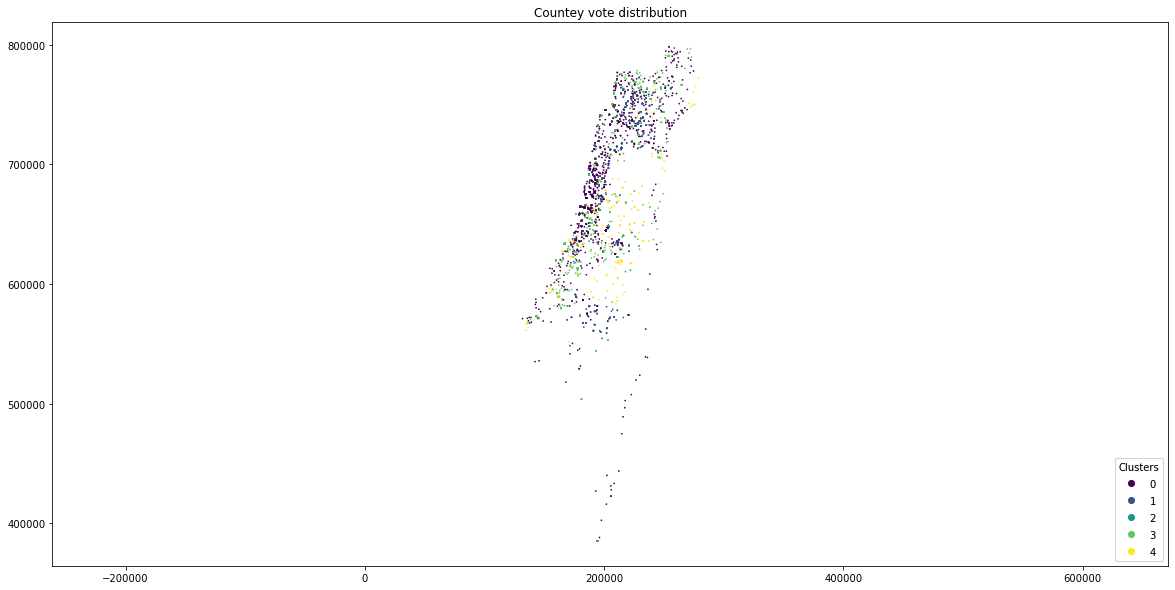

In [114]:
x = merge_pd['x_coordinate'].to_numpy()
y = merge_pd['y_coordinate'].to_numpy()
kmeans_label= merge_pd['kmeans_predict'].to_numpy()
plot_a_map(x,y, merge_pd['kmeans_predict'])

It can been seen that the cluster geographical is quiet fit the demographics distribution in the country.

For example, cluster number 1 with dominant arabic parties is distributed along the north part of the country,
and at the south, palces that we have many arabic settlement.

# Predictive Model

In this part of the assignment, base on the clustering resluts, i'll construct a multi class clasification predictive model for vote distribution - base on ballot boxes training dataset that we know the labels (from the clustering of the previous part)
we can predict other ballot boxes votes base on features i didnt use in the clustering part

# Data Arrangment (Pre EDA)


### Data types conversion

In [130]:
#copy the merge_pd for model_dataframe
model_dataframe=merge_pd.copy()
model_dataframe.dtypes[:50]

 שם ישוב                  object
symbol                     int64
מספר קלפי                float64
בזב                        int64
מצביעים                    int64
פסולים                     int64
כשרים                      int64
אמת                      float64
ג                        float64
ד                        float64
הי                       float64
הפ                       float64
הק                       float64
ו                        float64
ז                        float64
זה                       float64
זך                       float64
טב                       float64
יק                       float64
כן                       float64
מחל                      float64
מרץ                      float64
נ                        float64
ני                       float64
נץ                       float64
נק                       float64
עם                       float64
פ                        float64
פה                       float64
פז                       float64
פי        

In [131]:
## Categorical
model_dataframe[' שם ישוב']= model_dataframe[' שם ישוב'].astype('category')
model_dataframe['שם יישוב.1']= model_dataframe['שם יישוב.1'].astype('category')
model_dataframe['תעתיק']= model_dataframe['תעתיק'].astype('category')
model_dataframe['symbol']= model_dataframe['symbol'].astype('category')
model_dataframe['מחוז']= model_dataframe['מחוז'].astype('category')
model_dataframe['נפה']= model_dataframe['נפה'].astype('category')
model_dataframe['דת יישוב']= model_dataframe['דת יישוב'].astype('category')
model_dataframe['מעמד מונציפאלי']= model_dataframe['מעמד מונציפאלי'].astype('category')
model_dataframe['שיוך מטרופוליני']= model_dataframe['שיוך מטרופוליני'].astype('category')
model_dataframe['מספר קלפי']= model_dataframe['מספר קלפי'].astype('category')
model_dataframe['אזור טבעי']= model_dataframe['אזור טבעי'].astype('category')

# Numeric
model_dataframe['בזב']= model_dataframe['בזב'].astype('float64')
model_dataframe['מצביעים']= model_dataframe['מצביעים'].astype('float64')
model_dataframe['פסולים']= model_dataframe['פסולים'].astype('float64')
model_dataframe['כשרים']= model_dataframe['כשרים'].astype('float64')
#model_dataframe.dtypes[:50]

In [132]:
## Categorical
model_dataframe['שנת ייסוד']= model_dataframe['שנת ייסוד'].astype('category')
model_dataframe['תעתיק פרסומים']= model_dataframe['תעתיק פרסומים'].astype('category')
model_dataframe['שנת עיבוד']= model_dataframe['שנת עיבוד'].astype('category')
model_dataframe['שדה לקישור']= model_dataframe['שדה לקישור'].astype('category')
model_dataframe['coordinate']= model_dataframe['coordinate'].astype('category')
model_dataframe['kmeans_predict']= model_dataframe['kmeans_predict'].astype('category')
model_dataframe['מרחב משטרה']= model_dataframe['מרחב משטרה'].astype('category')
model_dataframe['kmeans_predict']= model_dataframe['kmeans_predict'].astype('category')

model_dataframe['צורת יישוב שוטפת']= model_dataframe['צורת יישוב שוטפת'].astype('category')
model_dataframe['ועדת תכנון']= model_dataframe['ועדת תכנון'].astype('category')

# Numeric
model_dataframe['קואורדינטות']= model_dataframe['קואורדינטות'].astype('float64')
model_dataframe['x_coordinate']= model_dataframe['x_coordinate'].astype('float64')
model_dataframe['y_coordinate']= model_dataframe['y_coordinate'].astype('float64')
model_dataframe['השתייכות ארגונית']= model_dataframe['השתייכות ארגונית'].astype('float64')
#model_dataframe.dtypes[50:]


In [133]:
model_dataframe.describe()

,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,הי,הפ,הק,...,שס,סך הכל אוכלוסייה 2013,יהודים ואחרים,יהודים,ערבים,השתייכות ארגונית,קואורדינטות,גובה ממוצע,x_coordinate,y_coordinate
count,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,...,10108.000000,10050.00000,8986.000000,8985.000000,3126.000000,940.000000,1.010800e+04,10051.000000,10108.000000,10108.000000
mean,559.598734,379.244064,4.046696,375.197368,0.114669,0.044552,0.027871,0.000139,0.001022,0.000194,...,0.088646,157313.09204,147.687826,139.184686,80.428119,7.900000,1.971628e+09,161.629191,197156.049664,672053.410170
std,149.156501,138.160522,4.069642,137.328678,0.089176,0.145677,0.086431,0.000749,0.004939,0.000900,...,0.101582,210416.57715,153.524065,147.682111,116.416908,6.213164,2.119701e+08,217.749295,21196.710508,58064.177092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,49.00000,0.100000,0.100000,0.100000,1.000000,1.317857e+09,-376.000000,131780.000000,385150.000000
25%,490.000000,299.000000,1.000000,295.000000,0.048151,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015000,19631.00000,24.800000,23.300000,17.500000,1.000000,1.812665e+09,31.000000,181260.000000,638802.500000
50%,587.000000,369.000000,3.000000,365.000000,0.101738,0.004367,0.000000,0.000000,0.000000,0.000000,...,0.053384,69320.00000,91.500000,88.400000,20.600000,9.000000,1.919568e+09,55.000000,191950.000000,664850.000000
75%,664.000000,442.000000,6.000000,439.000000,0.165437,0.012270,0.001998,0.000000,0.001015,0.000000,...,0.126165,216511.00000,219.000000,202.300000,50.600000,15.000000,2.106337e+09,215.000000,210627.500000,713880.000000
max,894.000000,1228.000000,114.000000,1208.000000,0.900000,0.997763,0.889680,0.022857,0.334286,0.021505,...,0.854369,829863.00000,522.200000,509.600000,307.600000,19.000000,2.786977e+09,1230.000000,278690.000000,798170.000000


# Exploratory Data Analysis (EDA)

## Check for missing values:
I'll look for missing data: NaN values or short strings composed of only spaces. 
* NaN records are efficiently handled with [.isnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html),[.dropna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
 and [.drop()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

### Detect & remove NaN values:

In [134]:
# Check for the existence of NaN values in a cell:
model_dataframe.isnull().sum()[:50]

 שם ישוב                    0
symbol                      0
מספר קלפי                   0
בזב                         0
מצביעים                     0
פסולים                      0
כשרים                       0
אמת                         0
ג                           0
ד                           0
הי                          0
הפ                          0
הק                          0
ו                           0
ז                           0
זה                          0
זך                          0
טב                          0
יק                          0
כן                          0
מחל                         0
מרץ                         0
נ                           0
ני                          0
נץ                          0
נק                          0
עם                          0
פ                           0
פה                          0
פז                          0
פי                          0
פך                          0
פנ                          0
פץ        

In [135]:
model_dataframe.isnull().sum()[50:]

יהודים ואחרים       1122
יהודים              1123
ערבים               6982
שנת ייסוד           1121
צורת יישוב שוטפת       0
השתייכות ארגונית    9168
קואורדינטות            0
גובה ממוצע            57
ועדת תכנון             0
מרחב משטרה             0
תעתיק פרסומים         51
שנת עיבוד             51
שדה לקישור          2629
coordinate             0
x_coordinate           0
y_coordinate           0
kmeans_predict         0
dtype: int64

Here we see many missing values at "Jews", "Arabs" and "Jew & Others",
the meaning of the missing values is no population of that ethnic group.
this mesurments are in power of three

### Correlations

In [136]:
# Get numeric columns names

numeric_columns_names = model_dataframe.select_dtypes("number").columns

print('Number of numeric features:', numeric_columns_names.shape)
print(numeric_columns_names)

Number of numeric features: (47,)
Index(['בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ג', 'ד', 'הי', 'הפ', 'הק',
       'ו', 'ז', 'זה', 'זך', 'טב', 'יק', 'כן', 'מחל', 'מרץ', 'נ', 'ני', 'נץ',
       'נק', 'עם', 'פ', 'פה', 'פז', 'פי', 'פך', 'פנ', 'פץ', 'ץ', 'צפ', 'צק',
       'ק', 'קנ', 'רק', 'שס', 'סך הכל אוכלוסייה 2013', 'יהודים ואחרים',
       'יהודים', 'ערבים', 'השתייכות ארגונית', 'קואורדינטות', 'גובה ממוצע',
       'x_coordinate', 'y_coordinate'],
      dtype='object')


In [137]:
#Get categoric columns names (not including label column)

categoric_columns_names = model_dataframe.select_dtypes("category").columns

print('Number of categorical features:', categoric_columns_names.shape)
print(categoric_columns_names)

Number of categorical features: (20,)
Index([' שם ישוב', 'symbol', 'מספר קלפי', 'שם יישוב.1', 'תעתיק', 'מחוז', 'נפה',
       'אזור טבעי', 'מעמד מונציפאלי', 'שיוך מטרופוליני', 'דת יישוב',
       'שנת ייסוד', 'צורת יישוב שוטפת', 'ועדת תכנון', 'מרחב משטרה',
       'תעתיק פרסומים', 'שנת עיבוד', 'שדה לקישור', 'coordinate',
       'kmeans_predict'],
      dtype='object')


In [138]:
#numeric_df
numeric_df = model_dataframe[[name for name in numeric_columns_names]]
#categoric_df
#categoric_df = model_dataframe[[name for name in categoric_columns_names]]
#numeric_df

### Numeric - Numeric Correlation

<AxesSubplot:>

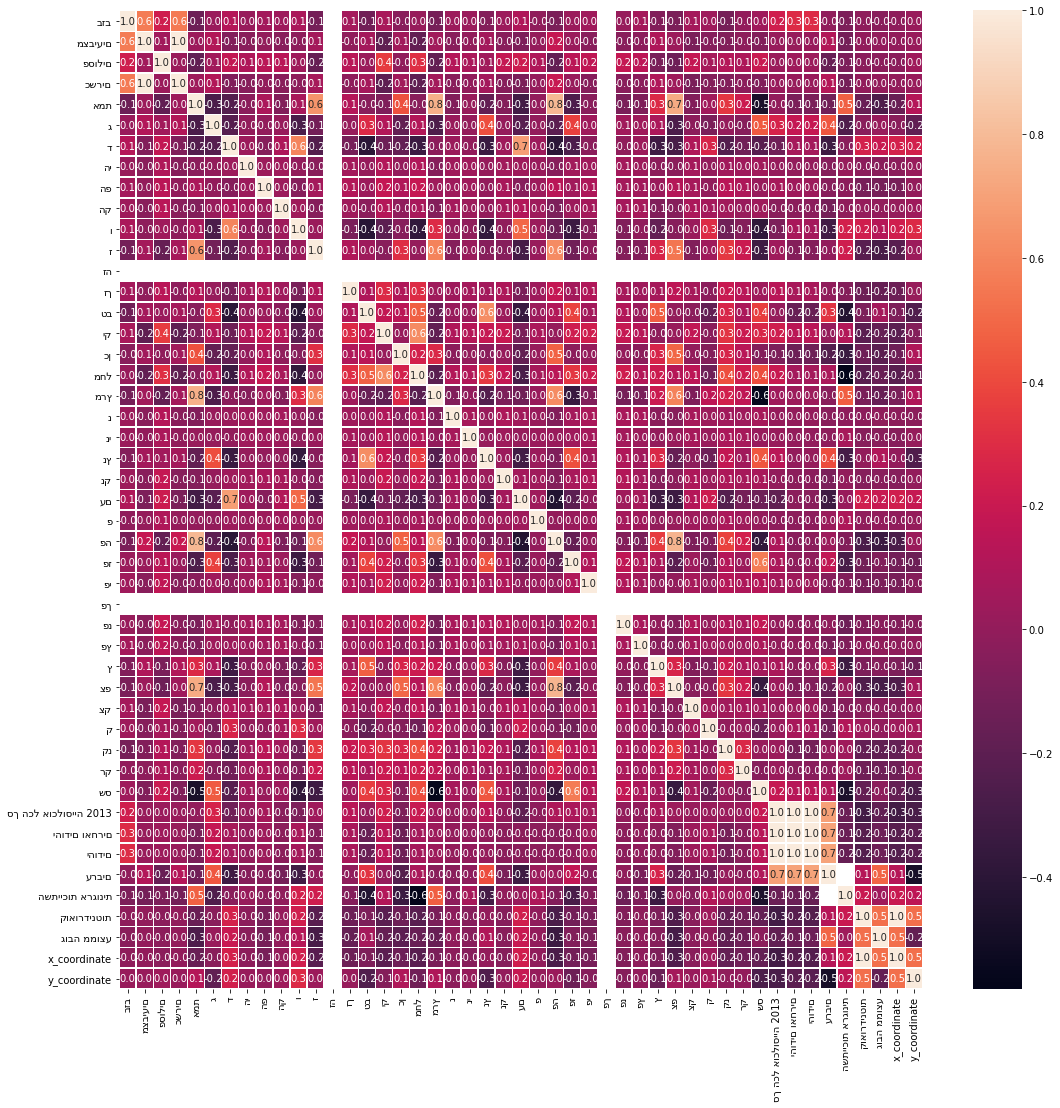

In [43]:
f, ax = plt.subplots(figsize = (18, 18))

corrMatt = numeric_df.corr(method='spearman') #we use spearman since its knows to work with features that dont have normal distribution

sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)

# Data Cleansing


### Missing values


In [139]:
def get_missings_matrix_df(df):

    missings_matrix_df = df.isna()
    
    for name in df.columns:
        missings_matrix_df.loc[(missings_matrix_df[name] == True), name] = 1
        missings_matrix_df.loc[(missings_matrix_df[name] == False), name] = 0
    
    return missings_matrix_df


In [140]:
missing_matt = get_missings_matrix_df(model_dataframe)
missing_matt.describe()

,שם ישוב,symbol,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,...,גובה ממוצע,ועדת תכנון,מרחב משטרה,תעתיק פרסומים,שנת עיבוד,שדה לקישור,coordinate,x_coordinate,y_coordinate,kmeans_predict
count,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,...,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108
unique,1,1,1,1,1,1,1,1,1,1,...,2,1,1,2,2,2,1,1,1,1
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,...,10051,10108,10108,10057,10057,7479,10108,10108,10108,10108


1. Building missings DF
Useful link:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html#pandas.DataFrame.from_dict

I build a dictionary of { coulmn_name : missing values percantage }

orient='index' -> the keys should be rows, pass ‘index’ keys: coulmns names

In [141]:
missing_dict = dict()

for name in model_dataframe.columns:
    missing_dict[name] = [model_dataframe[name].isna().sum(), model_dataframe[name].isna().sum()/len(model_dataframe[name])*100]

    
missing_df = pd.DataFrame.from_dict(missing_dict,orient='index', columns = ['missings_number', 'missings_%'])
missing_df

,missings_number,missings_%
שם ישוב,0,0.000000
symbol,0,0.000000
מספר קלפי,0,0.000000
בזב,0,0.000000
מצביעים,0,0.000000
...,...,...
שדה לקישור,2629,26.009102
coordinate,0,0.000000
x_coordinate,0,0.000000
y_coordinate,0,0.000000


In [142]:
variables_with_missings_number = len(missing_df[missing_df['missings_number'] > 0])
total_missings_number = sum(missing_df['missings_number'])

print("Variables with missings number:", variables_with_missings_number)
print("Total missings number:", total_missings_number)

Variables with missings number: 15
Total missings number: 25390


## Imputation 

In [143]:
model_dataframe[numeric_columns_names] = model_dataframe[numeric_columns_names].fillna(0)
model_dataframe['השתייכות ארגונית']= model_dataframe['השתייכות ארגונית'].astype('category')
numeric_columns_names.drop('השתייכות ארגונית')

model_dataframe.head(10)

#* about "Organizational affiliation" column,we fill the nan values with zero - nan means there is no organizational affiliation 

,שם ישוב,symbol,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,...,גובה ממוצע,ועדת תכנון,מרחב משטרה,תעתיק פרסומים,שנת עיבוד,שדה לקישור,coordinate,x_coordinate,y_coordinate,kmeans_predict
0,אבו ג'ווייעד (שבט,967,1.0,690.0,118.0,8.0,110.0,0.000000,0.000000,0.027273,...,0.0,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=967,2040057100,204000.0,571000.0,1
1,אבו ג'ווייעד (שבט,967,2.0,753.0,99.0,3.0,96.0,0.020833,0.000000,0.104167,...,0.0,699.0,3481.0,NaN,NaN,http://gis/Yeshuvim_allyears/start.aspx?stl=967,2040057100,204000.0,571000.0,1
2,אבו גוש,472,1.0,725.0,352.0,13.0,339.0,0.067847,0.011799,0.342183,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520.0,634810.0,1
3,אבו גוש,472,2.0,670.0,329.0,7.0,322.0,0.080745,0.000000,0.369565,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520.0,634810.0,1
4,אבו גוש,472,3.0,704.0,345.0,20.0,325.0,0.067692,0.003077,0.341538,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520.0,634810.0,1
5,אבו גוש,472,4.0,667.0,342.0,19.0,323.0,0.061920,0.000000,0.405573,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520.0,634810.0,1
6,אבו גוש,472,5.0,588.0,237.0,11.0,226.0,0.057522,0.004425,0.331858,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520.0,634810.0,1
7,אבו גוש,472,6.0,535.0,239.0,9.0,230.0,0.060870,0.004348,0.400000,...,686.0,152.0,6129.0,Abu Ghosh,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=472,2105263481,210520.0,634810.0,1
8,אבו סנאן,473,1.0,631.0,366.0,4.0,362.0,0.024862,0.002762,0.113260,...,71.0,252.0,1330.0,Abu Sinan,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=473,2160676282,216060.0,762820.0,1
9,אבו סנאן,473,2.0,620.0,388.0,8.0,380.0,0.010526,0.000000,0.144737,...,71.0,252.0,1330.0,Abu Sinan,2013,http://gis/Yeshuvim_allyears/start.aspx?stl=473,2160676282,216060.0,762820.0,1


In [49]:
numeric_columns_names

Index(['בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ג', 'ד', 'הי', 'הפ', 'הק',
       'ו', 'ז', 'זה', 'זך', 'טב', 'יק', 'כן', 'מחל', 'מרץ', 'נ', 'ני', 'נץ',
       'נק', 'עם', 'פ', 'פה', 'פז', 'פי', 'פך', 'פנ', 'פץ', 'ץ', 'צפ', 'צק',
       'ק', 'קנ', 'רק', 'שס', 'סך הכל אוכלוסייה 2013', 'יהודים ואחרים',
       'יהודים', 'ערבים', 'השתייכות ארגונית', 'קואורדינטות', 'גובה ממוצע',
       'x_coordinate', 'y_coordinate'],
      dtype='object')

# Feature Engineering

### Removing all unnecessary columns


In [51]:
model_dataframe.drop(model_dataframe.iloc[:, 7:41], inplace = True, axis = 1)
columns_to_drop=['מספר קלפי','סך הכל אוכלוסייה 2013','נפה','מחוז','צורת יישוב שוטפת','ועדת תכנון','x_coordinate','y_coordinate','שדה לקישור','שנת ייסוד','תעתיק','שם יישוב.1','תעתיק פרסומים','מרחב משטרה',' שם ישוב','coordinate','שיוך מטרופוליני','אזור טבעי','מעמד מונציפאלי','שנת עיבוד']

model_dataframe.drop(columns_to_drop,inplace = True, axis = 1)

In [52]:
model_dataframe.isnull().sum()

symbol              0
בזב                 0
מצביעים             0
פסולים              0
כשרים               0
דת יישוב            1
יהודים ואחרים       0
יהודים              0
ערבים               0
השתייכות ארגונית    0
קואורדינטות         0
גובה ממוצע          0
kmeans_predict      0
dtype: int64

In [53]:
# Drop rows which contain any NaN values
model_dataframe = model_dataframe.dropna()


In [54]:
model_dataframe.isnull().sum() #here we can see that there are no missing values

symbol              0
בזב                 0
מצביעים             0
פסולים              0
כשרים               0
דת יישוב            0
יהודים ואחרים       0
יהודים              0
ערבים               0
השתייכות ארגונית    0
קואורדינטות         0
גובה ממוצע          0
kmeans_predict      0
dtype: int64

In [55]:
model_dataframe.head(10)

,symbol,בזב,מצביעים,פסולים,כשרים,דת יישוב,יהודים ואחרים,יהודים,ערבים,השתייכות ארגונית,קואורדינטות,גובה ממוצע,kmeans_predict
0,967,690.0,118.0,8.0,110.0,3.0,0.0,0.0,0.0,0.0,2.040057e+09,0.0,1
1,967,753.0,99.0,3.0,96.0,3.0,0.0,0.0,0.0,0.0,2.040057e+09,0.0,1
2,472,725.0,352.0,13.0,339.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
3,472,670.0,329.0,7.0,322.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
4,472,704.0,345.0,20.0,325.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
5,472,667.0,342.0,19.0,323.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
6,472,588.0,237.0,11.0,226.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
7,472,535.0,239.0,9.0,230.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
8,473,631.0,366.0,4.0,362.0,2.0,0.0,0.0,13.0,0.0,2.160676e+09,71.0,1
9,473,620.0,388.0,8.0,380.0,2.0,0.0,0.0,13.0,0.0,2.160676e+09,71.0,1


In [56]:
#Remove line of zeros "jews", "jews & others", "arabs" - if there are no population we dont need that row

In [57]:
model_dataframe = model_dataframe.drop(model_dataframe[(model_dataframe['יהודים']==0.0) & (model_dataframe['ערבים']==0.0) & (model_dataframe['יהודים ואחרים']==0.0)].index).reset_index()
model_dataframe.drop('index',inplace = True, axis = 1) #drop the extra column
model_dataframe.head(10)

,symbol,בזב,מצביעים,פסולים,כשרים,דת יישוב,יהודים ואחרים,יהודים,ערבים,השתייכות ארגונית,קואורדינטות,גובה ממוצע,kmeans_predict
0,472,725.0,352.0,13.0,339.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
1,472,670.0,329.0,7.0,322.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
2,472,704.0,345.0,20.0,325.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
3,472,667.0,342.0,19.0,323.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
4,472,588.0,237.0,11.0,226.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
5,472,535.0,239.0,9.0,230.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
6,473,631.0,366.0,4.0,362.0,2.0,0.0,0.0,13.0,0.0,2.160676e+09,71.0,1
7,473,620.0,388.0,8.0,380.0,2.0,0.0,0.0,13.0,0.0,2.160676e+09,71.0,1
8,473,632.0,401.0,5.0,396.0,2.0,0.0,0.0,13.0,0.0,2.160676e+09,71.0,1
9,473,609.0,360.0,4.0,356.0,2.0,0.0,0.0,13.0,0.0,2.160676e+09,71.0,1


In [58]:
#chane the jews & other column to other
model_dataframe['יהודים ואחרים'] = model_dataframe['יהודים ואחרים']-model_dataframe['יהודים']
model_dataframe = model_dataframe.rename(columns={"יהודים ואחרים":"others"})# i change it to English becouse hebrew makes problems

# Feature Selection

 ### Seperating target variable and features variables
 


In [59]:
# y target variable
y = model_dataframe.kmeans_predict

# X features variables
X_initial= model_dataframe.loc[:, model_dataframe.columns != 'is_acquired']
X_initial.shape

(10049, 13)

In [60]:
X_initial.head(5)

,symbol,בזב,מצביעים,פסולים,כשרים,דת יישוב,others,יהודים,ערבים,השתייכות ארגונית,קואורדינטות,גובה ממוצע,kmeans_predict
0,472,725.0,352.0,13.0,339.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
1,472,670.0,329.0,7.0,322.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
2,472,704.0,345.0,20.0,325.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
3,472,667.0,342.0,19.0,323.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1
4,472,588.0,237.0,11.0,226.0,2.0,0.0,0.0,6.5,0.0,2.105263e+09,686.0,1


In [61]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: kmeans_predict, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

 ### Convert categorical variable into dummy / indicator variables

In [62]:
X_final = pd.get_dummies(X_initial)
# df_final
len(X_final.columns)


1216

In [63]:
X_final.head(5)

,בזב,מצביעים,פסולים,כשרים,others,יהודים,ערבים,קואורדינטות,גובה ממוצע,symbol_7,...,השתייכות ארגונית_10.0,השתייכות ארגונית_11.0,השתייכות ארגונית_13.0,השתייכות ארגונית_15.0,השתייכות ארגונית_19.0,kmeans_predict_0,kmeans_predict_1,kmeans_predict_2,kmeans_predict_3,kmeans_predict_4
0,725.0,352.0,13.0,339.0,0.0,0.0,6.5,2.105263e+09,686.0,0,...,0,0,0,0,0,0,1,0,0,0
1,670.0,329.0,7.0,322.0,0.0,0.0,6.5,2.105263e+09,686.0,0,...,0,0,0,0,0,0,1,0,0,0
2,704.0,345.0,20.0,325.0,0.0,0.0,6.5,2.105263e+09,686.0,0,...,0,0,0,0,0,0,1,0,0,0
3,667.0,342.0,19.0,323.0,0.0,0.0,6.5,2.105263e+09,686.0,0,...,0,0,0,0,0,0,1,0,0,0
4,588.0,237.0,11.0,226.0,0.0,0.0,6.5,2.105263e+09,686.0,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_final,y,test_size=0.2, random_state=42)

In [65]:
y_train = y_train.cat.codes
y_test = y_test.cat.codes

In [66]:
y_train.head(10)

1561    2
9810    3
4052    2
149     3
5817    3
3053    3
4253    3
5552    3
2742    3
8025    1
dtype: int8

## Simple modeling (no hyperparameters usage yet)

### Cross validate models
I compared classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.

* Random Forest
* Gradient Boosting
* KNN


In [67]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate

In [68]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


from sklearn.ensemble import RandomForestClassifier

In [69]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits = 5)

In [70]:
# Modeling step Test differents algorithms 
random_state = 2

classifiers = []


classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())

In [71]:
classifiers

[RandomForestClassifier(random_state=2),
 GradientBoostingClassifier(random_state=2),
 KNeighborsClassifier()]

In [72]:
# n_jobs -> how many parallel running threads I want, -1 will choose automatically acording computer CPU number

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision': make_scorer(precision_score, average='macro'),
                 }

cv_results = []

for classifier in classifiers :
    cv_results.append(cross_validate(classifier, X_train, y = y_train, scoring = 'accuracy', cv = kfold, n_jobs = -1))

In [73]:
cv_results

[{'fit_time': array([3.96270967, 3.91506553, 3.93900967, 4.24155951, 3.9672873 ]),
  'score_time': array([0.10797477, 0.10641575, 0.09097338, 0.06724739, 0.10053039]),
  'test_score': array([1.        , 1.        , 1.        , 0.99937811, 1.        ])},
 {'fit_time': array([75.3011992 , 75.54198503, 75.72728872, 76.07652068, 76.40137696]),
  'score_time': array([0.049124  , 0.04561734, 0.04433584, 0.06276393, 0.06248379]),
  'test_score': array([1., 1., 1., 1., 1.])},
 {'fit_time': array([0.14091969, 0.13892221, 0.10665989, 0.09052157, 0.10348845]),
  'score_time': array([1.91887617, 1.91688156, 1.93565798, 1.94136691, 1.8053689 ]),
  'test_score': array([0.75373134, 0.75808458, 0.7431592 , 0.75932836, 0.75482265])}]

In [74]:
cv_results[0]['test_score']
cv_results[0]

{'fit_time': array([3.96270967, 3.91506553, 3.93900967, 4.24155951, 3.9672873 ]),
 'score_time': array([0.10797477, 0.10641575, 0.09097338, 0.06724739, 0.10053039]),
 'test_score': array([1.        , 1.        , 1.        , 0.99937811, 1.        ])}

In [75]:
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result['test_score'].mean())
    cv_std.append(cv_result['test_score'].std())

cv_res_df = pd.DataFrame({"CrossVal_Means":cv_means, "CrossVal_errors": cv_std, "Algorithm":["RandomForest",
"GradientBoosting","KNeighbors"]})

In [76]:
cv_res_df
cv_res_df.sort_values(by='CrossVal_Means',ascending=False)

,CrossVal_Means,CrossVal_errors,Algorithm
1,1.000000,0.000000,GradientBoosting
0,0.999876,0.000249,RandomForest
2,0.753825,0.005713,KNeighbors


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


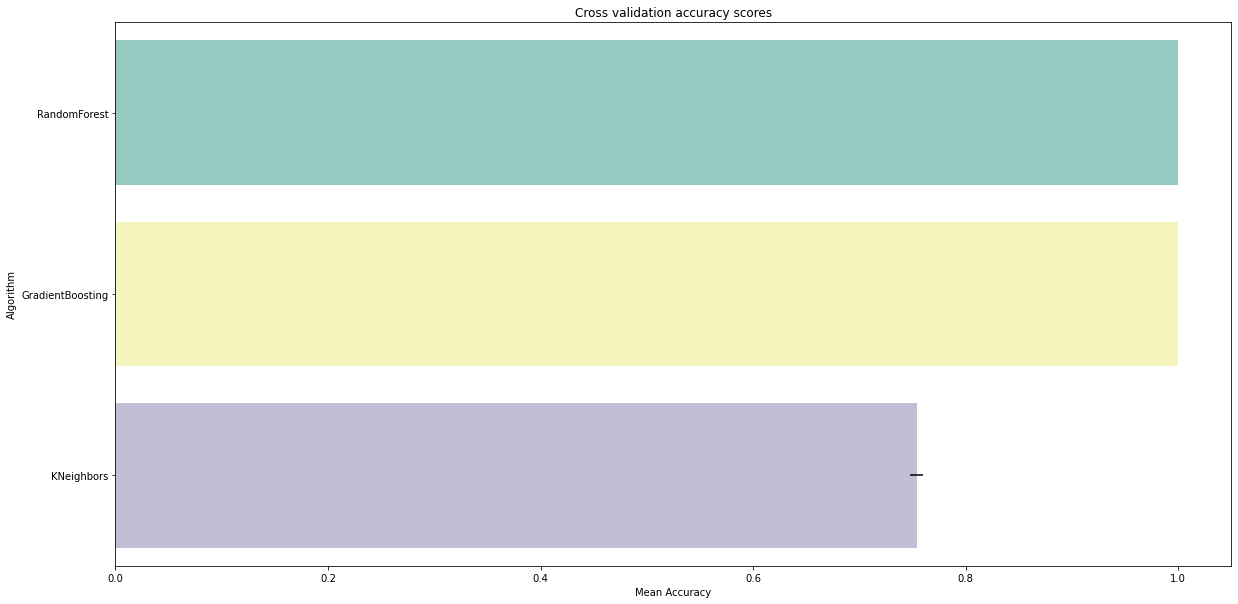

In [77]:
g = sns.barplot("CrossVal_Means","Algorithm", data = cv_res_df, palette="Set3", orient = "h", **{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation accuracy scores")

# Hyperparameter tunning for best models
I performed a grid search optimization for RandomForest and GradientBoosting classifiers.

I set the "n_jobs" parameter to -1 so it set automatically to my cpu's number - the computation time is clearly reduced.


### Random forest tuning
I'll perform tuning only for depth, as otherwise the hyperparameters process take way too long on my computer

In [91]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

max_depth = [3, 4, 6, 8, 10]

## Search grid for optimal parameters
rf_param_grid = {"max_depth": max_depth,
               "max_features": [1, 3, 10],
               "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
               "bootstrap": [False],
               "n_estimators" :[100,300],
               "criterion": ["gini"]
                }


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


In [93]:
# Best score
gsRFC.best_score_
print("Best: %f using %s" % (gsRFC.best_score_, gsRFC.best_params_))

Best: 0.891404 using {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


### Gradient boosting tuning
Due to long running times, i didnt use the Gradient boosting tunning. However I attached the code for it below

In [80]:
# Gradient boosting tunning

# GBC = GradientBoostingClassifier()

# gb_param_grid = {'loss' : ["deviance"],
#               'n_estimators' : [100,200,300],
#               'learning_rate': [0.1, 0.05, 0.01],
#               'max_depth': [4, 8],
#               'min_samples_leaf': [100,150],
#               'max_features': [0.3, 0.1] 
#               }

# gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

# gsGBC.fit(X_train,y_train)

# GBC_best = gsGBC.best_estimator_


In [81]:
# # Best score
# gsGBC.best_score_
# print("Best: %f using %s" % (gsRFC.best_score_, gsRFC.best_params_))

# Predictions
Analyzing Random Forest predictions

In [105]:
rf = classifiers[0]
rf.fit(X_train, y_train)

# train predicitions
predictions_train = rf.predict(X_train)

# tests predictions
predictions_test = rf.predict(X_test)

### Confusion matrix

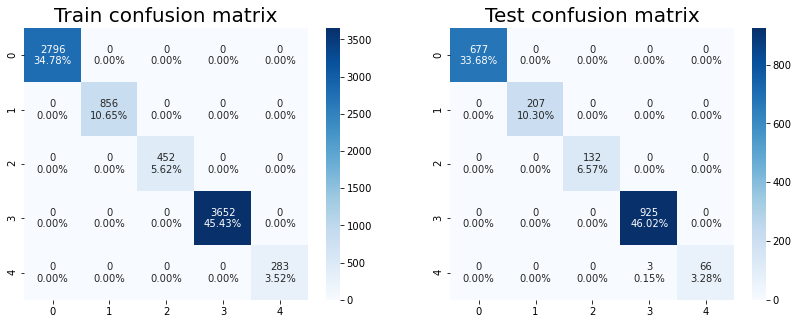

In [106]:
# Report the confusion matrix
train_confusion_matrix = metrics.confusion_matrix(y_train, predictions_train)
test_confusion_matrix = metrics.confusion_matrix(y_test, predictions_test)

#print(train_confusion_matrix)
#print(test_confusion_matrix)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[14, 5])

# Train
group_counts = ["{0:0.0f}".format(value) for value in train_confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in train_confusion_matrix.flatten()/np.sum(train_confusion_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(train_confusion_matrix, annot=labels, fmt='', cmap='Blues', ax=ax1)
ax1.set_title("Train confusion matrix",fontsize=20);

# Test
group_counts = ["{0:0.0f}".format(value) for value in test_confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in test_confusion_matrix.flatten()/np.sum(test_confusion_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(test_confusion_matrix, annot=labels, fmt='', cmap='Blues', ax=ax2)
ax2.set_title("Test confusion matrix",fontsize=20);

plt.show()

# Plot learning curves (overfitting test)

Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

In [101]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

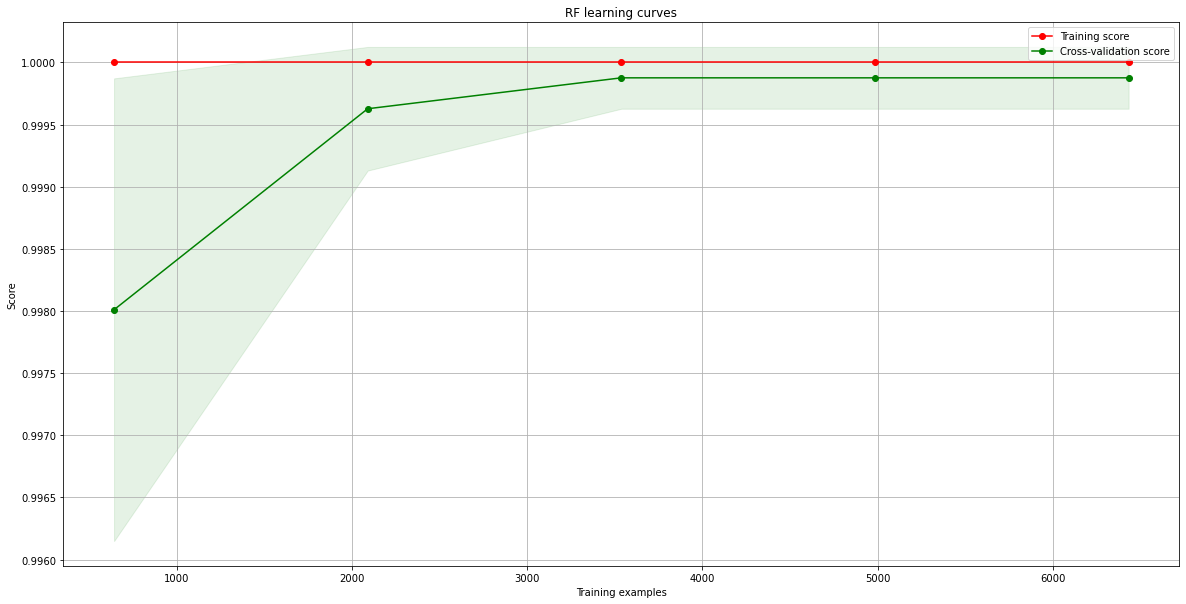

In [104]:
g = plot_learning_curve(rf,"RF learning curves",X_train,y_train,cv=kfold)